In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [14]:
data = pd.read_csv("diabetes_data_upload.csv") 

In [15]:
data.head(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


In [16]:
data.isnull()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
516,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
517,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
518,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [39]:
X = data.drop(columns=["Gender","class"])
y = data["class"]

In [40]:
X.head()

,Age,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes
1,58,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No
2,41,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No
3,45,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No
4,60,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [41]:
y.head()

0    Positive
1    Positive
2    Positive
3    Positive
4    Positive
Name: class, dtype: object

In [44]:
X.replace({'Yes': 1, 'No': 0}, inplace=True)

In [45]:
X.head()

,Age,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
def minkowski_distance(a, b, p=2):
    dim = len(a)
    distance = 0 # initial dist
    for d in range(dim):
        distance += abs(a[d] - b[d])**p    
    distance = distance**(1/p)
    
    return distance
minkowski_distance(a=X.iloc[0], b=X.iloc[1], p=1) #Manhattan dist

25.0

In [49]:
test_pt = [148, 85, 103,71, 44]
distances = []

for i in X.index:
    
    distances.append(minkowski_distance(test_pt, X.iloc[i]))
    
df_dists = pd.DataFrame(data=distances, index=X.index, columns=['dist'])
df_dists.head()

,dist
0,190.218296
1,181.173950
2,189.747200
3,187.595309
4,178.754021


In [50]:
df_nn = df_dists.sort_values(by=['dist'], axis=0)[:3] #using 3 nearest neighbour
df_nn

,dist
186,166.820263
102,166.820263
101,167.863039


In [51]:
from collections import Counter
counter = Counter(y[df_nn.index])
counter.most_common()[0][0]

'Positive'

In [62]:
def knn_predict(X_train, X_test, y_train, y_test, k, p):
    
    from collections import Counter
    y_hat_test = []

    for test_point in X_test:
        distances = []

        for train_point in X_train:
            distance = minkowski_distance(test_point, train_point, p=p)
            distances.append(distance)
            
        df_dists = pd.DataFrame(data=distances, columns=['dist'], 
                                index=y_train.index)
        
        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]

        counter = Counter(y_train[df_nn.index])

        prediction = counter.most_common()[0][0]
        
        y_hat_test.append(prediction)
        
    return y_hat_test

y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k=3, p=1)

print(y_hat_test)


['Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Ne

In [53]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_hat_test))

0.9038461538461539


In [63]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_hat_test, pos_label='Positive')
print("Precision Score:", precision)


Precision Score: 0.9692307692307692


In [65]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_hat_test, pos_label='Positive')
print("Recall (Sensitivity) Score:", recall)

Recall (Sensitivity) Score: 0.8873239436619719


In [66]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_hat_test, pos_label='Positive')
print("F1-Score:", f1)

F1-Score: 0.9264705882352942


In [68]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_hat_test)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[31  2]
 [ 8 63]]


In [54]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3, p=2)   #just to verify 
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)

print(f"Sklearn KNN Accuracy: {accuracy_score(y_test, y_pred_test)}")


Sklearn KNN Accuracy: 0.8942307692307693


Text(0, 0.5, 'Accuracy (%)')

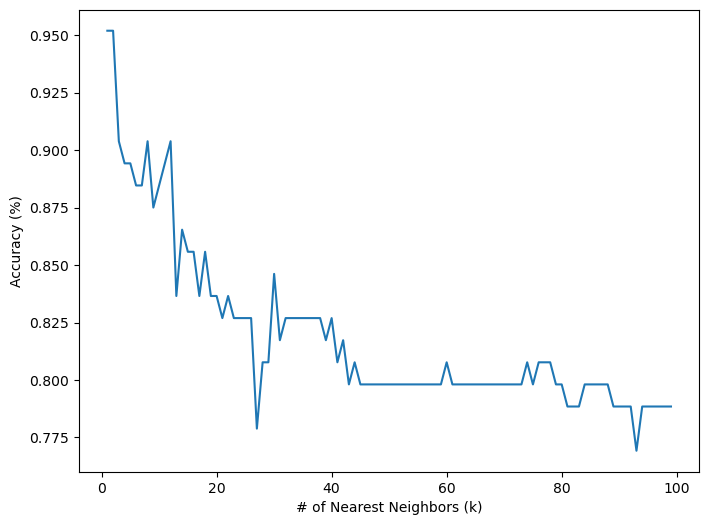

In [55]:
accuracies = []

for k in range(1,100):
    y_hat_test = knn_predict(X_train, X_test, y_train, y_test, k, p=1)
    accuracies.append(accuracy_score(y_test, y_hat_test))

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,100), accuracies)
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)')

In [56]:
y_test.head()

275    Negative
93     Positive
6      Positive
167    Positive
90     Positive
Name: class, dtype: object

In [57]:
print(y_test)

275    Negative
93     Positive
6      Positive
167    Positive
90     Positive
         ...   
69     Positive
357    Negative
423    Positive
334    Negative
227    Negative
Name: class, Length: 104, dtype: object


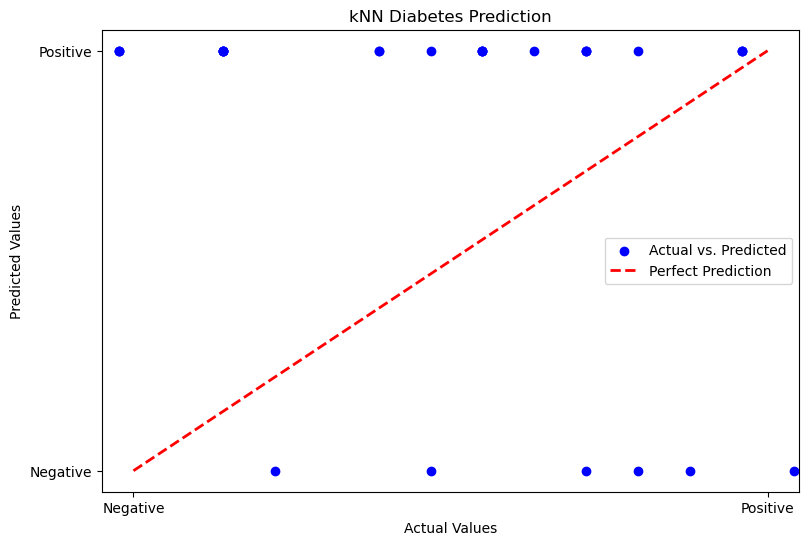

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))
plt.scatter(X_test[:,0], y_test, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('kNN Diabetes Prediction')
plt.legend()
plt.show()

In [59]:
def fitness_function(params):
    n_neighbors = int(params['n_neighbors'])
    knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    return -accuracy_score(y_test, y_pred) 

In [60]:
n_neighbors_range = (1, 30) 

def initialize_population(population_size):
    return [random.randint(n_neighbors_range[0], n_neighbors_range[1]) for _ in range(population_size)]


In [61]:
def OOA(SearchAgents, Max_iterations, lowerbound, upperbound, fitness):
    X = np.random.randint(lowerbound, upperbound + 1, size=(SearchAgents,))
    fit = np.array([fitness({'n_neighbors': X[i]}) for i in range(SearchAgents)])
    best_so_far = np.zeros(Max_iterations)
    
    for t in range(1, Max_iterations + 1):
        Fbest, blocation = min(fit), np.argmin(fit)

        if t == 1 or Fbest < best_so_far[t-2]:
            xbest, fbest = X[blocation], Fbest

        for i in range(SearchAgents):
            fish_position = np.where(fit < fit[i])[0]

            if fish_position.size == 0:
                selected_fish = xbest
            else:
                k = np.random.randint(fish_position.size)
                selected_fish = X[fish_position[k]]

            I = round(1 + np.random.rand())
            X_new_P1 = X[i] + np.random.rand() * (selected_fish - I * X[i])
            X_new_P1 = np.maximum(X_new_P1, lowerbound)
            X_new_P1 = np.minimum(X_new_P1, upperbound)

            fit_new_P1 = fitness({'n_neighbors': X_new_P1})
            if fit_new_P1 < fit[i]:
                X[i] = X_new_P1
                fit[i] = fit_new_P1

            X_new_P1 = X[i] + (lowerbound + np.random.rand() * (upperbound - lowerbound)) / t
            X_new_P1 = np.maximum(X_new_P1, lowerbound)
            X_new_P1 = np.minimum(X_new_P1, upperbound)

            fit_new_P1 = fitness({'n_neighbors': X_new_P1})
            if fit_new_P1 < fit[i]:
                X[i] = X_new_P1
                fit[i] = fit_new_P1

        best_so_far[t-1] = fbest

    return fbest, xbest, best_so_far


population_size = 10
max_iterations = 50
lowerbound = n_neighbors_range[0]
upperbound = n_neighbors_range[1]

Best_score, Best_pos, OOA_curve = OOA(population_size, max_iterations, lowerbound, upperbound, fitness_function)

print("Best Score:", Best_score)
print("Best Number of Neighbors:", Best_pos)


Best Score: -0.9519230769230769
Best Number of Neighbors: 1
